In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Load training data

In [2]:
train = pd.read_csv('exercise_04_train.csv')
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,11.107047,0.093337,asia,0.421524,35.259947,8.994318,-21.000182,-0.686588,2.949106,1
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,-1.991846,15.666187,asia,-0.132764,-1.192563,3.885024,-37.886523,-7.730392,-1.107330,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,17.132840,-5.333012,asia,1.432308,-3.435427,-1.133450,7.426099,-5.945534,1.316312,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,12.292136,4.177925,asia,0.733069,4.372964,15.529931,29.712153,2.240740,0.477195,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,6.218743,8.715709,asia,-0.977502,-30.085932,-8.244312,66.540331,-3.478195,-2.869702,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [4]:
train.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'y'],
      dtype='object', length=101)

In [5]:
train.select_dtypes('object').head()

,x34,x35,x41,x45,x68,x93
0,bmw,thur,$-1306.52,-0.01%,sept.,asia
1,Toyota,wednesday,$-24.86,0.0%,July,asia
2,bmw,thurday,$-110.85,0.0%,July,asia
3,Toyota,wed,$-324.43,0.01%,Apr,asia
4,Toyota,wednesday,$1213.37,-0.01%,Aug,asia


In [6]:
train.select_dtypes('int64').head()

,y
0,1
1,0
2,0
3,0
4,1


In [7]:
# target variable is y
train.y.unique()

array([1, 0], dtype=int64)

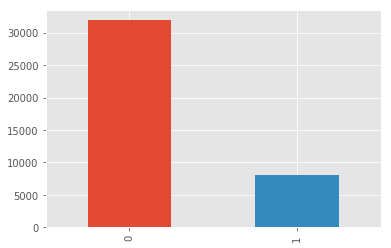

In [8]:
train.y.value_counts().plot.bar()
plt.show()

**In training data, there are 100 independent variables and target variable (y):**
- 96 variables are numerical values (float64)
- 6 ones are 'object'
- y is binary (int64)

### Are there any missing values?

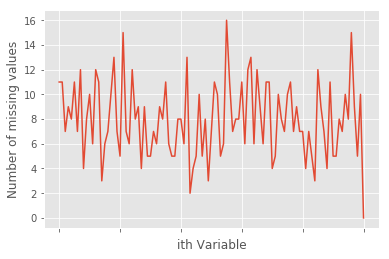

In [9]:
pd.isna(train).sum().plot()

plt.xlabel('ith Variable')
plt.ylabel('Number of missing values')
plt.show()

In [10]:
# for example, NaN of x0 variable
train[train.x0.isna()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
1919,NaN,-12.029430,1.967660,-25.458619,3.347549,-7.044035,0.422690,-1.017820,-6.798950,0.116693,...,-4.062220,-8.283502,asia,0.465423,-15.623708,-1.591273,-38.999797,6.812614,-0.164066,0
4642,NaN,-15.504466,9.880364,17.690255,-49.085996,-2.940437,-3.368611,2.022284,-21.847459,0.210588,...,10.030092,12.282799,asia,0.222353,-26.261976,-4.447520,-43.429618,-1.825203,3.645278,0
6436,NaN,-40.592264,-0.274435,-83.718708,7.996665,17.407382,5.247985,3.740611,9.528295,-2.957283,...,4.789815,-0.038899,asia,-0.673935,19.218895,-6.172221,-35.135543,-0.096322,0.374740,0
11512,NaN,-14.908325,5.354576,-11.772760,-5.040752,-5.647341,-4.049272,-0.259904,20.085593,-1.126169,...,-6.671421,3.660114,asia,1.523975,28.588124,-5.866635,20.378700,-3.997215,0.922166,1
15202,NaN,-15.718878,-3.825254,14.887091,16.523571,-34.946815,2.692222,-2.316918,2.447793,0.882098,...,-9.241631,-3.984282,asia,-0.179674,5.804716,5.392391,-64.024180,0.789703,4.375652,0
16007,NaN,12.634161,2.297951,-35.017990,-28.161114,14.522695,-5.176376,-3.132364,-7.057578,-2.508492,...,9.318754,4.351797,asia,-0.258345,14.609254,-4.400489,-64.293734,4.622598,0.158123,0
16687,NaN,-32.601964,8.896576,-31.894955,-33.032825,26.151386,2.724743,1.422049,-6.155861,0.422080,...,5.640485,3.731643,asia,1.913595,-18.476524,-19.383965,20.869248,0.592836,4.253966,0
26737,NaN,-2.489714,-7.272630,4.509181,15.414706,-11.249752,-0.659325,-6.509211,7.592872,-2.125403,...,-9.367874,3.752048,asia,0.955785,27.277818,-15.110332,-13.635669,-6.807423,-0.828865,0
27571,NaN,-0.358261,-6.743118,21.480650,12.817561,-3.417782,-1.186721,-0.610411,-17.087102,-1.192776,...,13.156894,9.967469,asia,1.517393,8.483050,-1.193394,7.288003,2.402598,-5.102131,0
38815,NaN,17.419257,-4.886233,36.437665,8.523351,22.537873,-1.853216,2.915841,-21.000745,2.095161,...,-3.933476,0.068337,asia,-0.046354,22.515089,-7.593546,-69.684707,-1.776818,-6.796864,0


**All independent variables have missing values.**

### Numerical variables

In [11]:
# Explore all numerical variables
num_var = train.select_dtypes('float').columns
len(num_var)

94

In [12]:
num_var

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x36', 'x37', 'x38', 'x39', 'x40', 'x42', 'x43',
       'x44', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54',
       'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75',
       'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85',
       'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96',
       'x97', 'x98', 'x99'],
      dtype='object')

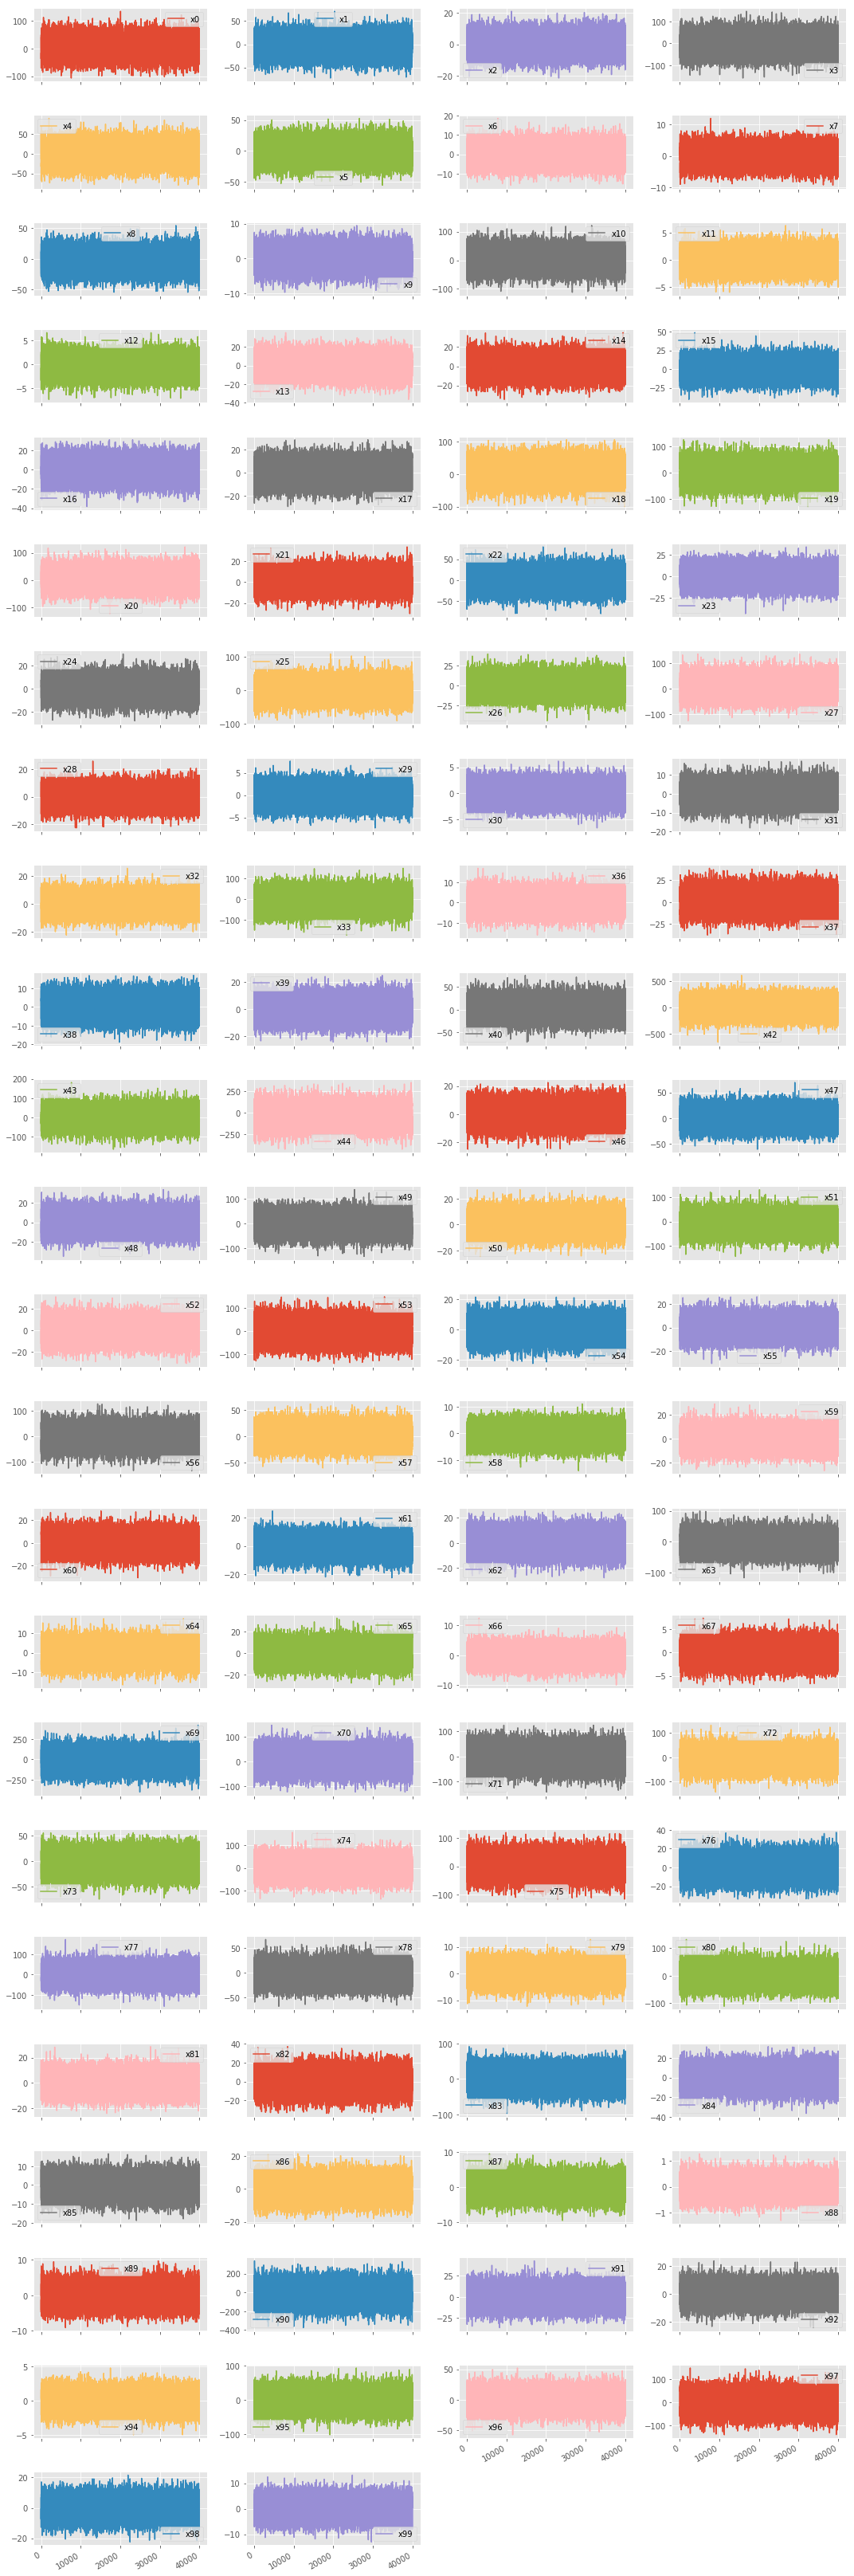

In [13]:
train[num_var].plot(subplots=True,figsize=(15,45),layout=(24,4))
plt.tight_layout()
plt.show()

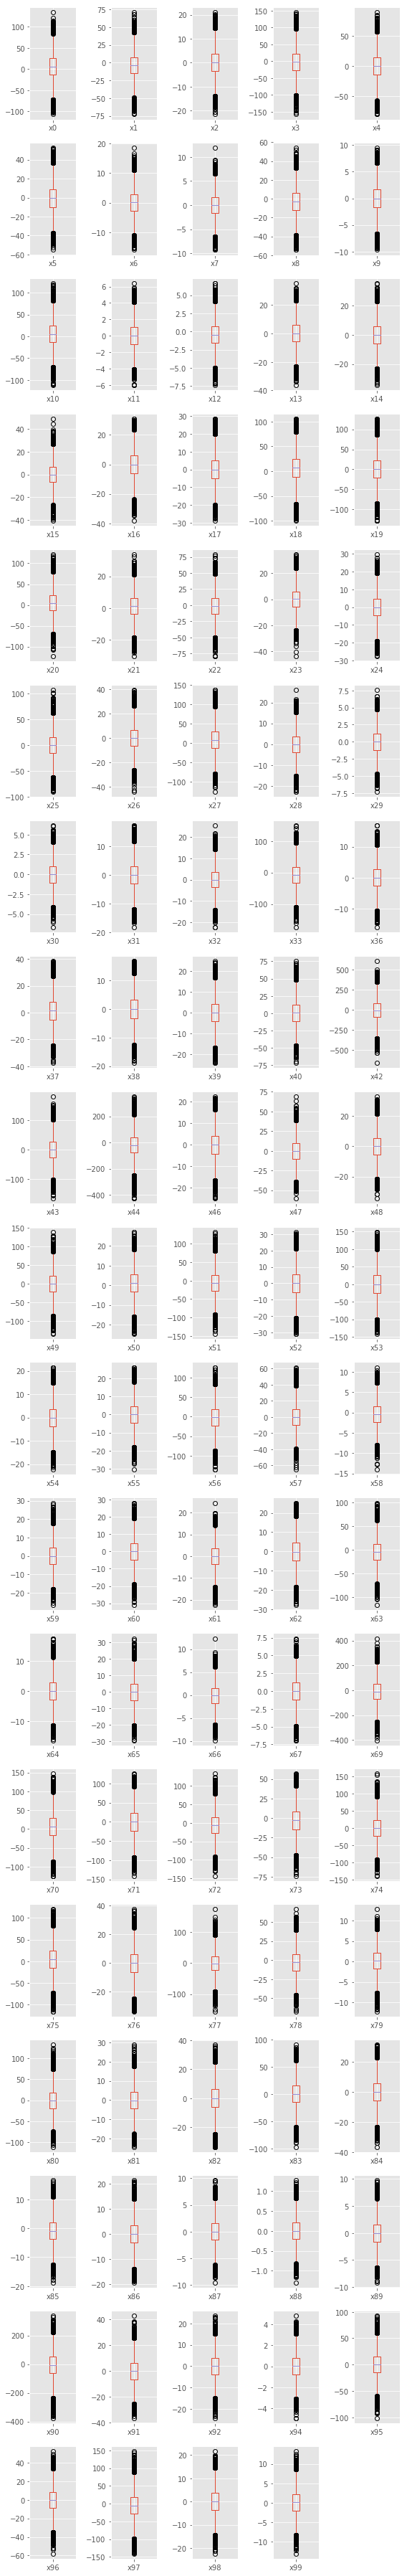

In [14]:
train[num_var].plot(subplots=True,kind='box',figsize=(8,50),layout=(19,5))
plt.tight_layout()
plt.show()

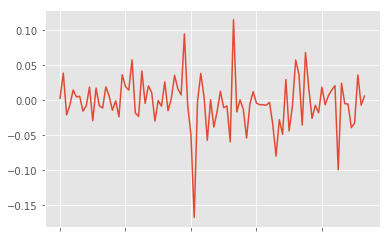

In [15]:
train[num_var].skew().plot()

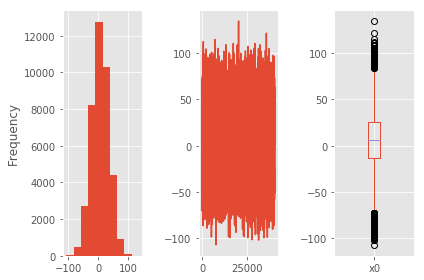

In [16]:
# Look at an example variable
plt.subplot(131)
train.x0.plot.hist()

plt.subplot(132)
train.x0.plot()

plt.subplot(133)
train.x0.plot.box()

plt.tight_layout()
plt.show()

**For all numerical variable:**
- Outlier points occur in all of them
- Values of skewness are close to 0
- Boxplot figures indicate that these variables are symmetry

### Should we remove all of these outlier points?

In [17]:
# Let's remove all of outlier points using Interquartile Range (IQR) Method 
train_removed = train

# length of data after every removal
len_df = []

for i in num_var:
    q1 = train_removed[i].quantile(0.25)
    q3 = train_removed[i].quantile(0.75)
    
    iqr = q3-q1
    v_low = q1 - 1.5*iqr
    v_high = q3 + 1.5*iqr

    train_removed = train_removed.loc[(train_removed[i] > v_low) & (train_removed[i] < v_high)]
    len_df.append(train_removed.shape[0])       

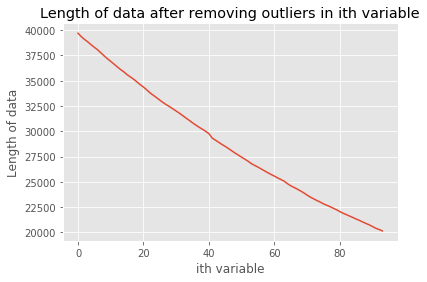

In [18]:
plt.plot(len_df)
plt.xlabel('ith variable')
plt.ylabel('Length of data')
plt.title('Length of data after removing outliers in ith variable')
plt.show()

**It shows that we will lost many data if removing all outliers (around 50%). <br>
Now, take a look at test data for these variables**

In [19]:
test=pd.read_csv('exercise_04_test.csv')
test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.196063,3.683995,-3.265963,7.982156,-2.638979,-0.798760,-3.345929,1.266333,-9.689859,1.512794,...,71.588700,14.065825,-3.061930,asia,0.023357,6.021137,-2.423546,-1.182148,1.514047,3.775888
1,23.155197,-9.226725,6.179996,-29.612592,-11.146301,-11.858857,-3.588747,-0.928037,-9.924414,0.932668,...,22.600000,-13.743287,-3.408293,asia,1.349389,19.646176,13.871395,38.657216,5.395564,3.139697
2,-13.969618,-0.343978,1.920740,-1.983859,-18.619658,-4.929527,-0.669704,1.906140,-17.125858,1.112156,...,-141.012215,6.507336,8.900449,asia,2.149993,22.719042,-2.958959,-36.135939,5.520687,3.733732
3,49.722481,-1.500789,-1.564326,-8.113622,9.696716,-21.883567,-0.737723,4.043544,-11.514792,-1.797036,...,-35.285961,-2.009043,-2.427585,asia,-3.052037,-19.306807,-1.275701,-39.607665,1.185943,-2.072836
4,-13.494403,7.445215,-1.721518,49.111766,-14.566832,-8.327643,-1.031431,0.033500,20.977351,6.744525,...,17.486682,-4.412938,5.808763,asia,-0.100660,6.732681,4.303092,-42.697656,7.144178,2.820698


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 100 columns):
x0     9997 non-null float64
x1     9999 non-null float64
x2     9998 non-null float64
x3     9996 non-null float64
x4     10000 non-null float64
x5     10000 non-null float64
x6     9996 non-null float64
x7     9999 non-null float64
x8     9997 non-null float64
x9     9999 non-null float64
x10    9999 non-null float64
x11    9997 non-null float64
x12    10000 non-null float64
x13    9994 non-null float64
x14    9998 non-null float64
x15    9997 non-null float64
x16    9998 non-null float64
x17    9997 non-null float64
x18    9998 non-null float64
x19    9998 non-null float64
x20    9998 non-null float64
x21    10000 non-null float64
x22    10000 non-null float64
x23    9997 non-null float64
x24    9996 non-null float64
x25    9997 non-null float64
x26    9998 non-null float64
x27    9995 non-null float64
x28    9997 non-null float64
x29    9999 non-null float64
x30    10000 non

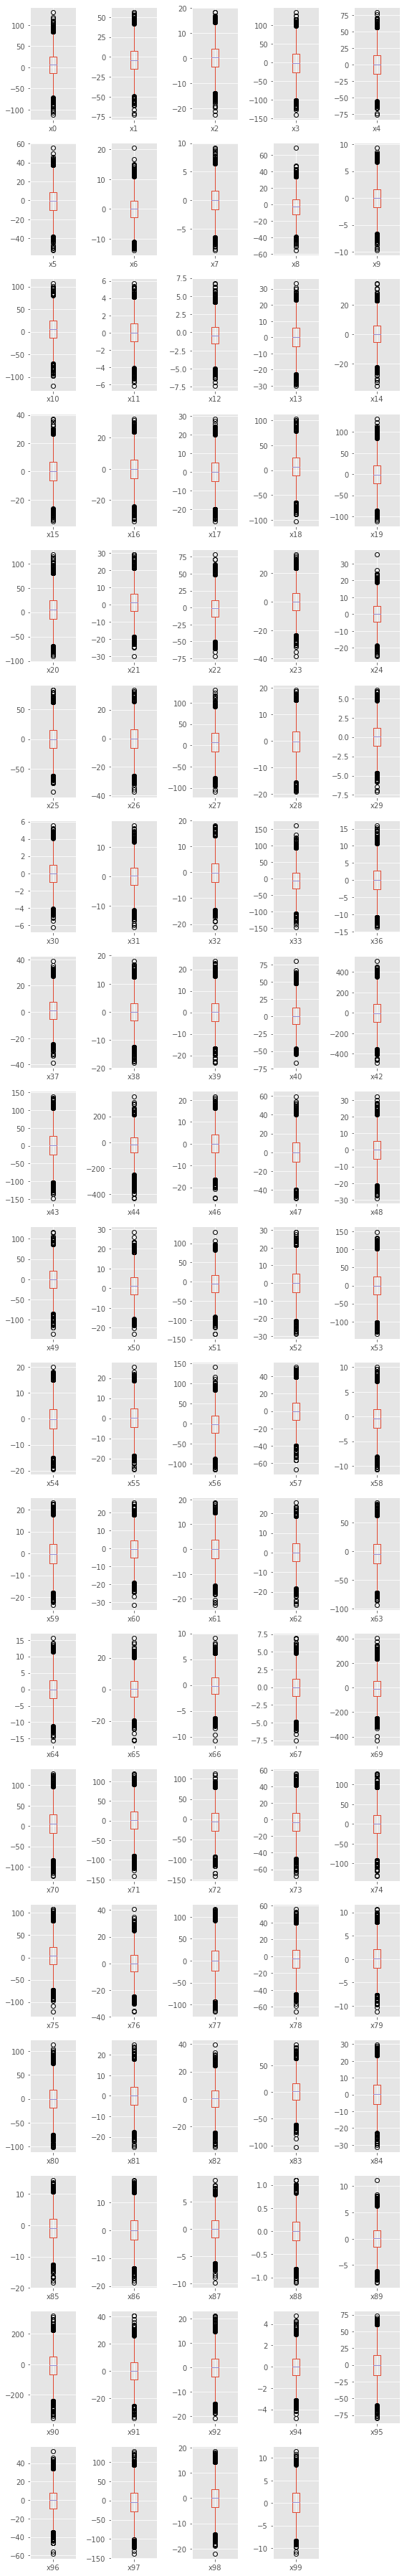

In [21]:
test[num_var].plot(subplots=True,kind='box',figsize=(8,50),layout=(19,5))
plt.tight_layout()
plt.show()

**Similarly, these variables also have outlier points (based on boxplot).**

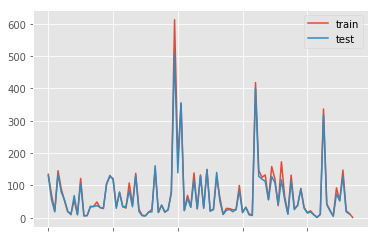

In [22]:
# compare maximum values
train.max().plot()
test.select_dtypes('float64').max().plot()
plt.legend(['train','test'])

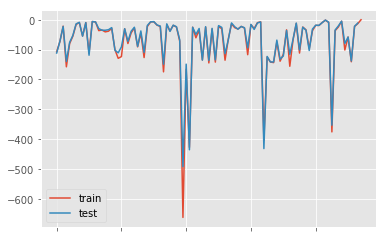

In [23]:
# compare minimum values
train.min().plot()
test.select_dtypes('float64').min().plot()
plt.legend(['train','test'])

**Both training and test data for these numerical variable have almost similarity in maximum and minimum values.<br>
Without information about these variables, it shoudl be kept all of them.
It is hard to conclude whether there are outlier values**

### Filling all missing values for numerical variables

In [24]:
#impute missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
train_df = imp.fit_transform(train.select_dtypes('float64'))

In [25]:
train_df = pd.DataFrame(data=train_df,columns=train.select_dtypes('float64').columns)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 94 columns):
x0     40000 non-null float64
x1     40000 non-null float64
x2     40000 non-null float64
x3     40000 non-null float64
x4     40000 non-null float64
x5     40000 non-null float64
x6     40000 non-null float64
x7     40000 non-null float64
x8     40000 non-null float64
x9     40000 non-null float64
x10    40000 non-null float64
x11    40000 non-null float64
x12    40000 non-null float64
x13    40000 non-null float64
x14    40000 non-null float64
x15    40000 non-null float64
x16    40000 non-null float64
x17    40000 non-null float64
x18    40000 non-null float64
x19    40000 non-null float64
x20    40000 non-null float64
x21    40000 non-null float64
x22    40000 non-null float64
x23    40000 non-null float64
x24    40000 non-null float64
x25    40000 non-null float64
x26    40000 non-null float64
x27    40000 non-null float64
x28    40000 non-null float64
x29    40000 non-null

### Other object variables


In [27]:
train.select_dtypes(include='object').head()

,x34,x35,x41,x45,x68,x93
0,bmw,thur,$-1306.52,-0.01%,sept.,asia
1,Toyota,wednesday,$-24.86,0.0%,July,asia
2,bmw,thurday,$-110.85,0.0%,July,asia
3,Toyota,wed,$-324.43,0.01%,Apr,asia
4,Toyota,wednesday,$1213.37,-0.01%,Aug,asia


#### x34: Trade name of car?

In [28]:
train.x34.value_counts()

volkswagon    12557
Toyota        10922
bmw            7288
Honda          5195
tesla          2286
chrystler      1209
nissan          339
ford            160
mercades         26
chevrolet        10
Name: x34, dtype: int64

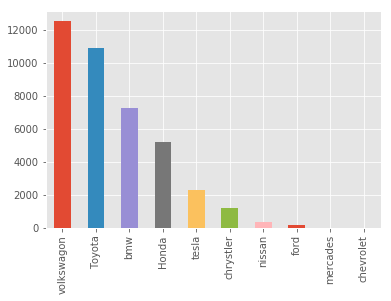

In [29]:
train.x34.value_counts().plot.bar()

In [30]:
train.x34.isna().sum()

8

**Missing values for 'x34' could be other names or one of these names in this available list. <br>
It should be kept these missing values as a NaN category.**

#### x35: weekday?

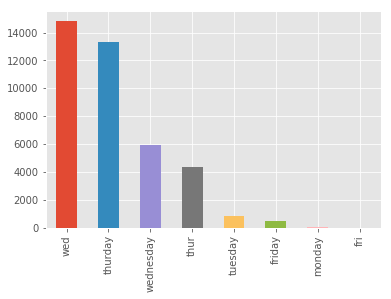

In [31]:
train.x35.value_counts().plot.bar()

**I guess 'x35' indicates the weekday (from Monday to Friday).**

In [32]:
# replace wed, thur and fri
train.loc[train.x35=='thur','x35'] = 'thurday'
train.loc[train.x35=='wed','x35'] = 'wednesday'
train.loc[train.x35=='fri','x35'] = 'friday'
train.x35.unique()

array(['thurday', 'wednesday', 'tuesday', 'friday', 'monday', nan],
      dtype=object)

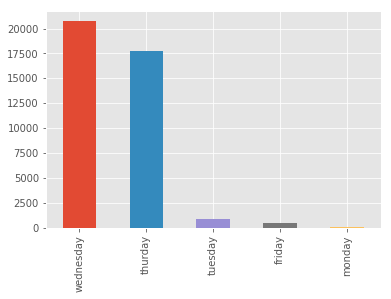

In [33]:
train.x35.value_counts().plot.bar()

In [34]:
train.x35.isna().sum()

11

**Missing values for 'x35' could be a weekend or weekday. <br>
So, it should be kept these missing values as a NaN category.**

### x41: money or cost?

In [35]:
# convert x41 into numerical variable by removing the dollar sign
train.x41 = train.x41.str.replace('$','').astype('float64')
train.x41.head()

0   -1306.52
1     -24.86
2    -110.85
3    -324.43
4    1213.37
Name: x41, dtype: float64

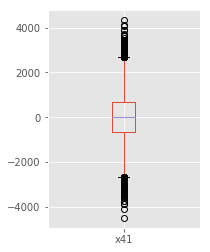

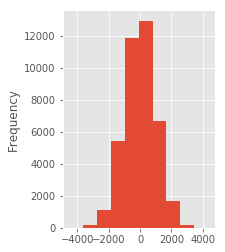

In [36]:
plt.subplot(121)
train.x41.plot.box()
plt.show()

plt.subplot(122)
train.x41.plot.hist()
plt.show()

In [37]:
train.x41.isna().sum()

6

**Numerical values for 'x41' look symmetry and many outlier points. <br>
For its missing values, I decide to delete them.**

### x45: percentage?

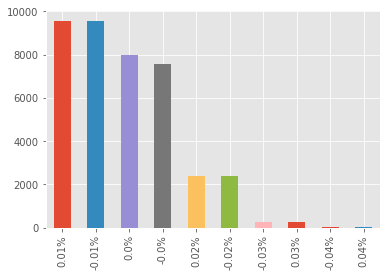

In [38]:
train.x45.value_counts().plot.bar()

In [39]:
train.x45.unique()

array(['-0.01%', '0.0%', '0.01%', '-0.0%', '0.02%', '-0.02%', '-0.03%',
       '0.03%', '-0.04%', nan, '0.04%'], dtype=object)

**Value of -0.0% and 0.0% are the presence for zero percent? <br>
Let's using z-test to evaluate it**

In [40]:
train[train.x45 == '-0.0%'].y.value_counts()

0    6062
1    1490
Name: y, dtype: int64

In [41]:
train[train.x45 == '0.0%'].y.value_counts()

0    6533
1    1439
Name: y, dtype: int64

In [42]:
from statsmodels.stats.proportion import proportions_ztest

In [43]:
# total observations for -0.0%
n1 = train[train.x45 == '-0.0%'].y.value_counts().sum()
n1

7552

In [44]:
# number of observations for -0.0% that target variable (y) is equal to 0
p1 = train[train.x45 == '-0.0%'].y.value_counts()[0]
p1

6062

In [45]:
# total observations for 0.0%
n2 = train[train.x45 == '0.0%'].y.value_counts().sum()
n2

7972

In [46]:
# number of observations for 0.0% that target variable (y) is equal to 0
p2 = train[train.x45 == '0.0%'].y.value_counts()[0]
p2

6533

**Null hypothesis (Ho): Proportion of y=0 for observations in group 0.0% and -0.0% is the same**

In [47]:
counts = np.array([p1, p2])
nobs = np.array([n1, n2])

zscore, pvalue = proportions_ztest(counts, nobs)
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -2.673, pvalue = 0.008


**With 5% of significant level, the null hypothesis can be rejected.
It means that 0.0% and -0.0% could represent some different information.
It should kept 'x45' as a categorical variable.
For its missing values, I keep it as a NaN type.**

In [48]:
train.groupby(['x45','y']).y.count()

x45     y
-0.0%   0    6062
        1    1490
-0.01%  0    7399
        1    2170
-0.02%  0    1628
        1     746
-0.03%  0     148
        1     131
-0.04%  0       4
        1      10
0.0%    0    6533
        1    1439
0.01%   0    7904
        1    1673
0.02%   0    1972
        1     418
0.03%   0     215
        1      42
0.04%   0      11
Name: y, dtype: int64

In [49]:
train.x45.isna().sum()

5

### x68: Month?

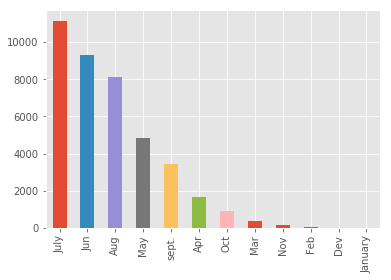

In [50]:
train.x68.value_counts().plot.bar()

In [51]:
train.x68.isna().sum()

11

**'x68' is the month in a year.
Its missing values can be deleted.**

### x93: Location?

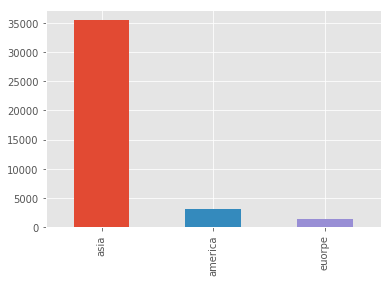

In [52]:
train.x93.value_counts().plot.bar()

In [53]:
train.x93.isna().sum()

7

**Its missing values can be considered as a NaN type.**

In [54]:
train_df.shape

(40000, 94)

In [55]:
train_df[['x34','x35','x41','x45','x68','x93','y']] = train[['x34','x35','x41','x45','x68','x93','y']]

In [56]:
df = pd.get_dummies(train_df,columns=['x34','x35','x45','x93'],dummy_na=True)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x45_0.0%,x45_0.01%,x45_0.02%,x45_0.03%,x45_0.04%,x45_nan,x93_america,x93_asia,x93_euorpe,x93_nan
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,0,0,0,0,0,0,0,1,0,0
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,1,0,0,0,0,0,0,1,0,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,1,0,0,0,0,0,0,1,0,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,0,1,0,0,0,0,0,1,0,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# remove missing values
df = df.dropna()

In [58]:
df = pd.get_dummies(df,columns=['x68'],dummy_na=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39983 entries, 0 to 39999
Columns: 141 entries, x0 to x68_nan
dtypes: float64(95), int64(1), uint8(45)
memory usage: 31.3 MB


In [60]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x68_nan
0,-17.933519,6.559220,2.422468,-27.737392,-12.080601,-3.892934,1.067466,0.935953,10.912007,1.107144,...,0,0,0,0,0,0,0,0,1,0
1,-37.214754,10.774930,5.404072,21.354738,0.612690,-3.093533,6.161558,-0.972156,-5.222169,0.384969,...,0,0,1,0,0,0,0,0,0,0
2,0.330441,-19.609972,-1.331804,-15.153892,19.710240,19.077300,-1.747110,0.545570,-1.464609,3.670570,...,0,0,1,0,0,0,0,0,0,0
3,-13.709765,-8.011390,-1.536483,23.129497,27.880879,20.573991,-1.617689,4.129694,1.139928,2.912838,...,0,0,0,0,0,0,0,0,0,0
4,-4.202598,7.076210,8.881550,23.600777,26.232164,-14.462320,3.231193,-0.069364,-7.310536,-2.268700,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# save train_processed data for modeling
df.to_csv('train_processed.csv',index=False)